#Implement Machine model by using logistic regression.

Name:- YASH PRASHANT BAGUL

Roll No.: TEE29

Seat No.: T216011

PRN No.:- 0120190422

Batch :- C2

# Logistic Regression

## Importing the libraries

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
%matplotlib inline 

## Importing the dataset

In [22]:
dataset = pd.read_csv('Forest.csv')
dataset.info()
dataset.describe()        #Describing the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          242 non-null    float64
 5    Ws          241 non-null    float64
 6   Rain         243 non-null    float64
 7   FFMC         242 non-null    float64
 8   DMC          241 non-null    float64
 9   DC           240 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          241 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      244 non-null    object 
dtypes: float64(8), int64(4), object(2)
memory usage: 26.8+ KB


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,FWI
count,244.000000,244.000000,244.0,244.000000,242.000000,241.000000,243.000000,242.000000,241.000000,244.000000,241.00000,243.000000
mean,15.754098,7.500000,2012.0,32.172131,61.871901,15.493776,0.762551,78.025207,14.699585,4.774180,16.63112,7.035391
std,8.825059,1.112961,0.0,3.633843,14.917620,2.819752,2.003313,14.239533,12.428521,4.175318,14.17399,7.440568
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,0.000000,1.10000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.375000,5.800000,1.400000,6.00000,0.700000
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.700000,11.300000,3.500000,12.10000,4.200000
75%,23.000000,8.000000,2012.0,35.000000,73.000000,17.000000,0.500000,88.300000,20.900000,7.300000,22.40000,11.450000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,19.000000,68.00000,31.100000


In [23]:
dataset.count()

day            244
month          244
year           244
Temperature    244
 RH            242
 Ws            241
Rain           243
FFMC           242
DMC            241
DC             240
ISI            244
BUI            241
FWI            243
Classes        244
dtype: int64

#Data Preprocessing

In [24]:
dataset.isnull()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,False,False,False,False,False,False,False,False,False,False,False,False,False,False
240,False,False,False,False,False,False,False,False,False,False,False,False,False,False
241,False,False,False,False,False,False,False,False,False,False,False,False,False,False
242,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [25]:
dataset.isnull().sum() #Total number of 'NA' as per each coloumn. 

day            0
month          0
year           0
Temperature    0
 RH            2
 Ws            3
Rain           1
FFMC           2
DMC            3
DC             4
ISI            0
BUI            3
FWI            1
Classes        0
dtype: int64

In [26]:
print(dataset['DC'].isnull().sum())  #Print number of values with values as 'NA' in coloumn named 'EstimatedSalary'.

4


In [27]:
dataset['Classes'] = dataset['Classes'].map({'not fire': 0,'fire': 1, }).astype(float) #Reshaping the data.

##Data Cleaning

In [29]:
dataset = dataset.dropna() #deleting values with 'NA' values.

In [30]:
dataset.corr() 

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,FWI,Classes
day,1.000000,-0.002200,NaN,0.124605,-0.089172,0.056982,-0.079499,0.237494,0.514718,0.204678,0.542706,0.376897,0.241509
month,-0.002200,1.000000,NaN,-0.049223,-0.048765,-0.044031,0.021108,0.036081,0.070155,0.065443,0.090709,0.079650,0.021055
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,0.124605,-0.049223,NaN,1.000000,-0.658816,-0.280167,-0.333180,0.676738,0.487995,0.599306,0.468309,0.565668,0.515003
RH,-0.089172,-0.048765,NaN,-0.658816,1.000000,0.236511,0.246047,-0.664463,-0.447866,-0.716297,-0.399706,-0.621535,-0.464673
Ws,0.056982,-0.044031,NaN,-0.280167,0.236511,1.000000,0.178716,-0.186394,-0.004994,0.016000,0.028324,0.037718,-0.074297
Rain,-0.079499,0.021108,NaN,-0.333180,0.246047,0.178716,1.000000,-0.548969,-0.284629,-0.346632,-0.297714,-0.322939,-0.384842
FFMC,0.237494,0.036081,NaN,0.676738,-0.664463,-0.186394,-0.548969,1.000000,0.601746,0.742949,0.595607,0.695259,0.786199
DMC,0.514718,0.070155,NaN,0.487995,-0.447866,-0.004994,-0.284629,0.601746,1.000000,0.685496,0.981349,0.875225,0.574651
ISI,0.204678,0.065443,NaN,0.599306,-0.716297,0.016000,-0.346632,0.742949,0.685496,1.000000,0.653976,0.925177,0.722334




```
# Descriptive Statistics

````

In [31]:
dataset.head(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0
1,2,6,2012,29,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0
2,3,6,2012,26,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0
3,4,6,2012,25,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0.0
4,5,6,2012,27,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0
5,6,6,2012,31,67.0,14.0,0.0,82.6,5.8,22.2,3.1,7.0,2.5,1.0
6,7,6,2012,33,54.0,13.0,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1.0
7,8,6,2012,30,73.0,15.0,0.0,86.6,12.1,38.3,5.6,13.5,7.1,1.0
8,9,6,2012,25,88.0,13.0,0.2,52.9,7.9,38.8,0.4,10.5,0.3,0.0
9,10,6,2012,28,79.0,12.0,0.0,73.2,9.5,46.3,1.3,12.6,0.9,0.0


In [32]:
dataset.tail(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
233,20,9,2012,34,58.0,13.0,0.2,79.5,18.7,88,2.1,24.4,3.8,0.0
234,21,9,2012,35,34.0,17.0,0.0,92.2,23.6,97.3,13.8,29.4,21.6,1.0
235,22,9,2012,33,64.0,13.0,0.0,88.9,26.1,106.3,7.1,32.4,13.7,1.0
236,23,9,2012,35,56.0,14.0,0.0,89.0,29.4,115.6,7.5,36.0,15.2,1.0
237,24,9,2012,26,49.0,6.0,2.0,61.3,11.9,28.1,0.6,11.9,0.4,0.0
238,25,9,2012,28,70.0,15.0,0.0,79.9,13.8,36.1,2.4,14.1,3.0,0.0
239,26,9,2012,30,65.0,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1.0
240,27,9,2012,28,87.0,15.0,4.4,41.1,6.5,8,0.1,6.2,0.0,0.0
241,28,9,2012,27,87.0,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0.0
242,29,9,2012,24,54.0,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0.0


In [33]:
dataset.sample(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
153,2,7,2012,33,48.0,16.0,0.0,87.6,7.9,17.8,6.8,7.8,6.4,1.0
76,16,8,2012,36,61.0,18.0,0.3,80.2,11.7,90.4,2.8,17.6,4.2,1.0
54,25,7,2012,31,65.0,18.0,0.0,84.3,12.5,88.7,4.8,18.5,7.3,1.0
32,3,7,2012,32,76.0,20.0,0.7,63.1,2.6,9.2,1.3,3.0,0.5,0.0
172,21,7,2012,36,29.0,18.0,0.0,93.9,39.6,80.6,18.5,39.5,30.0,1.0
183,1,8,2012,38,52.0,14.0,0.0,78.3,4.4,10.5,2.0,4.4,0.8,0.0
223,10,9,2012,29,74.0,15.0,1.1,59.5,4.7,8.2,0.8,4.6,0.3,0.0
182,31,7,2012,37,55.0,15.0,0.0,89.3,28.3,67.2,8.3,28.3,14.5,1.0
31,2,7,2012,27,75.0,19.0,1.2,55.7,2.4,8.3,0.8,2.8,0.3,0.0
224,11,9,2012,30,73.0,14.0,0.0,79.2,6.5,16.6,2.1,6.6,1.2,0.0


In [34]:
dataset.count()

day            220
month          220
year           220
Temperature    220
 RH            220
 Ws            220
Rain           220
FFMC           220
DMC            220
DC             220
ISI            220
BUI            220
FWI            220
Classes        220
dtype: int64

In [36]:
dataset['Rain '].sum()

164.0

In [38]:
dataset.loc[dataset['Classes'] == 1].count()

day            131
month          131
year           131
Temperature    131
 RH            131
 Ws            131
Rain           131
FFMC           131
DMC            131
DC             131
ISI            131
BUI            131
FWI            131
Classes        131
dtype: int64

In [35]:
dataset['Temperature'].mean()

32.35

In [39]:
dataset['Temperature'].median()

33.0

# Data Exploration and Visualization

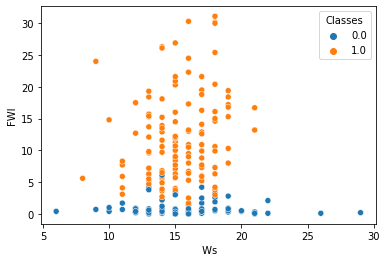

In [40]:
sns.scatterplot(data = dataset, x = ' Ws', y = 'FWI' , hue = 'Classes')

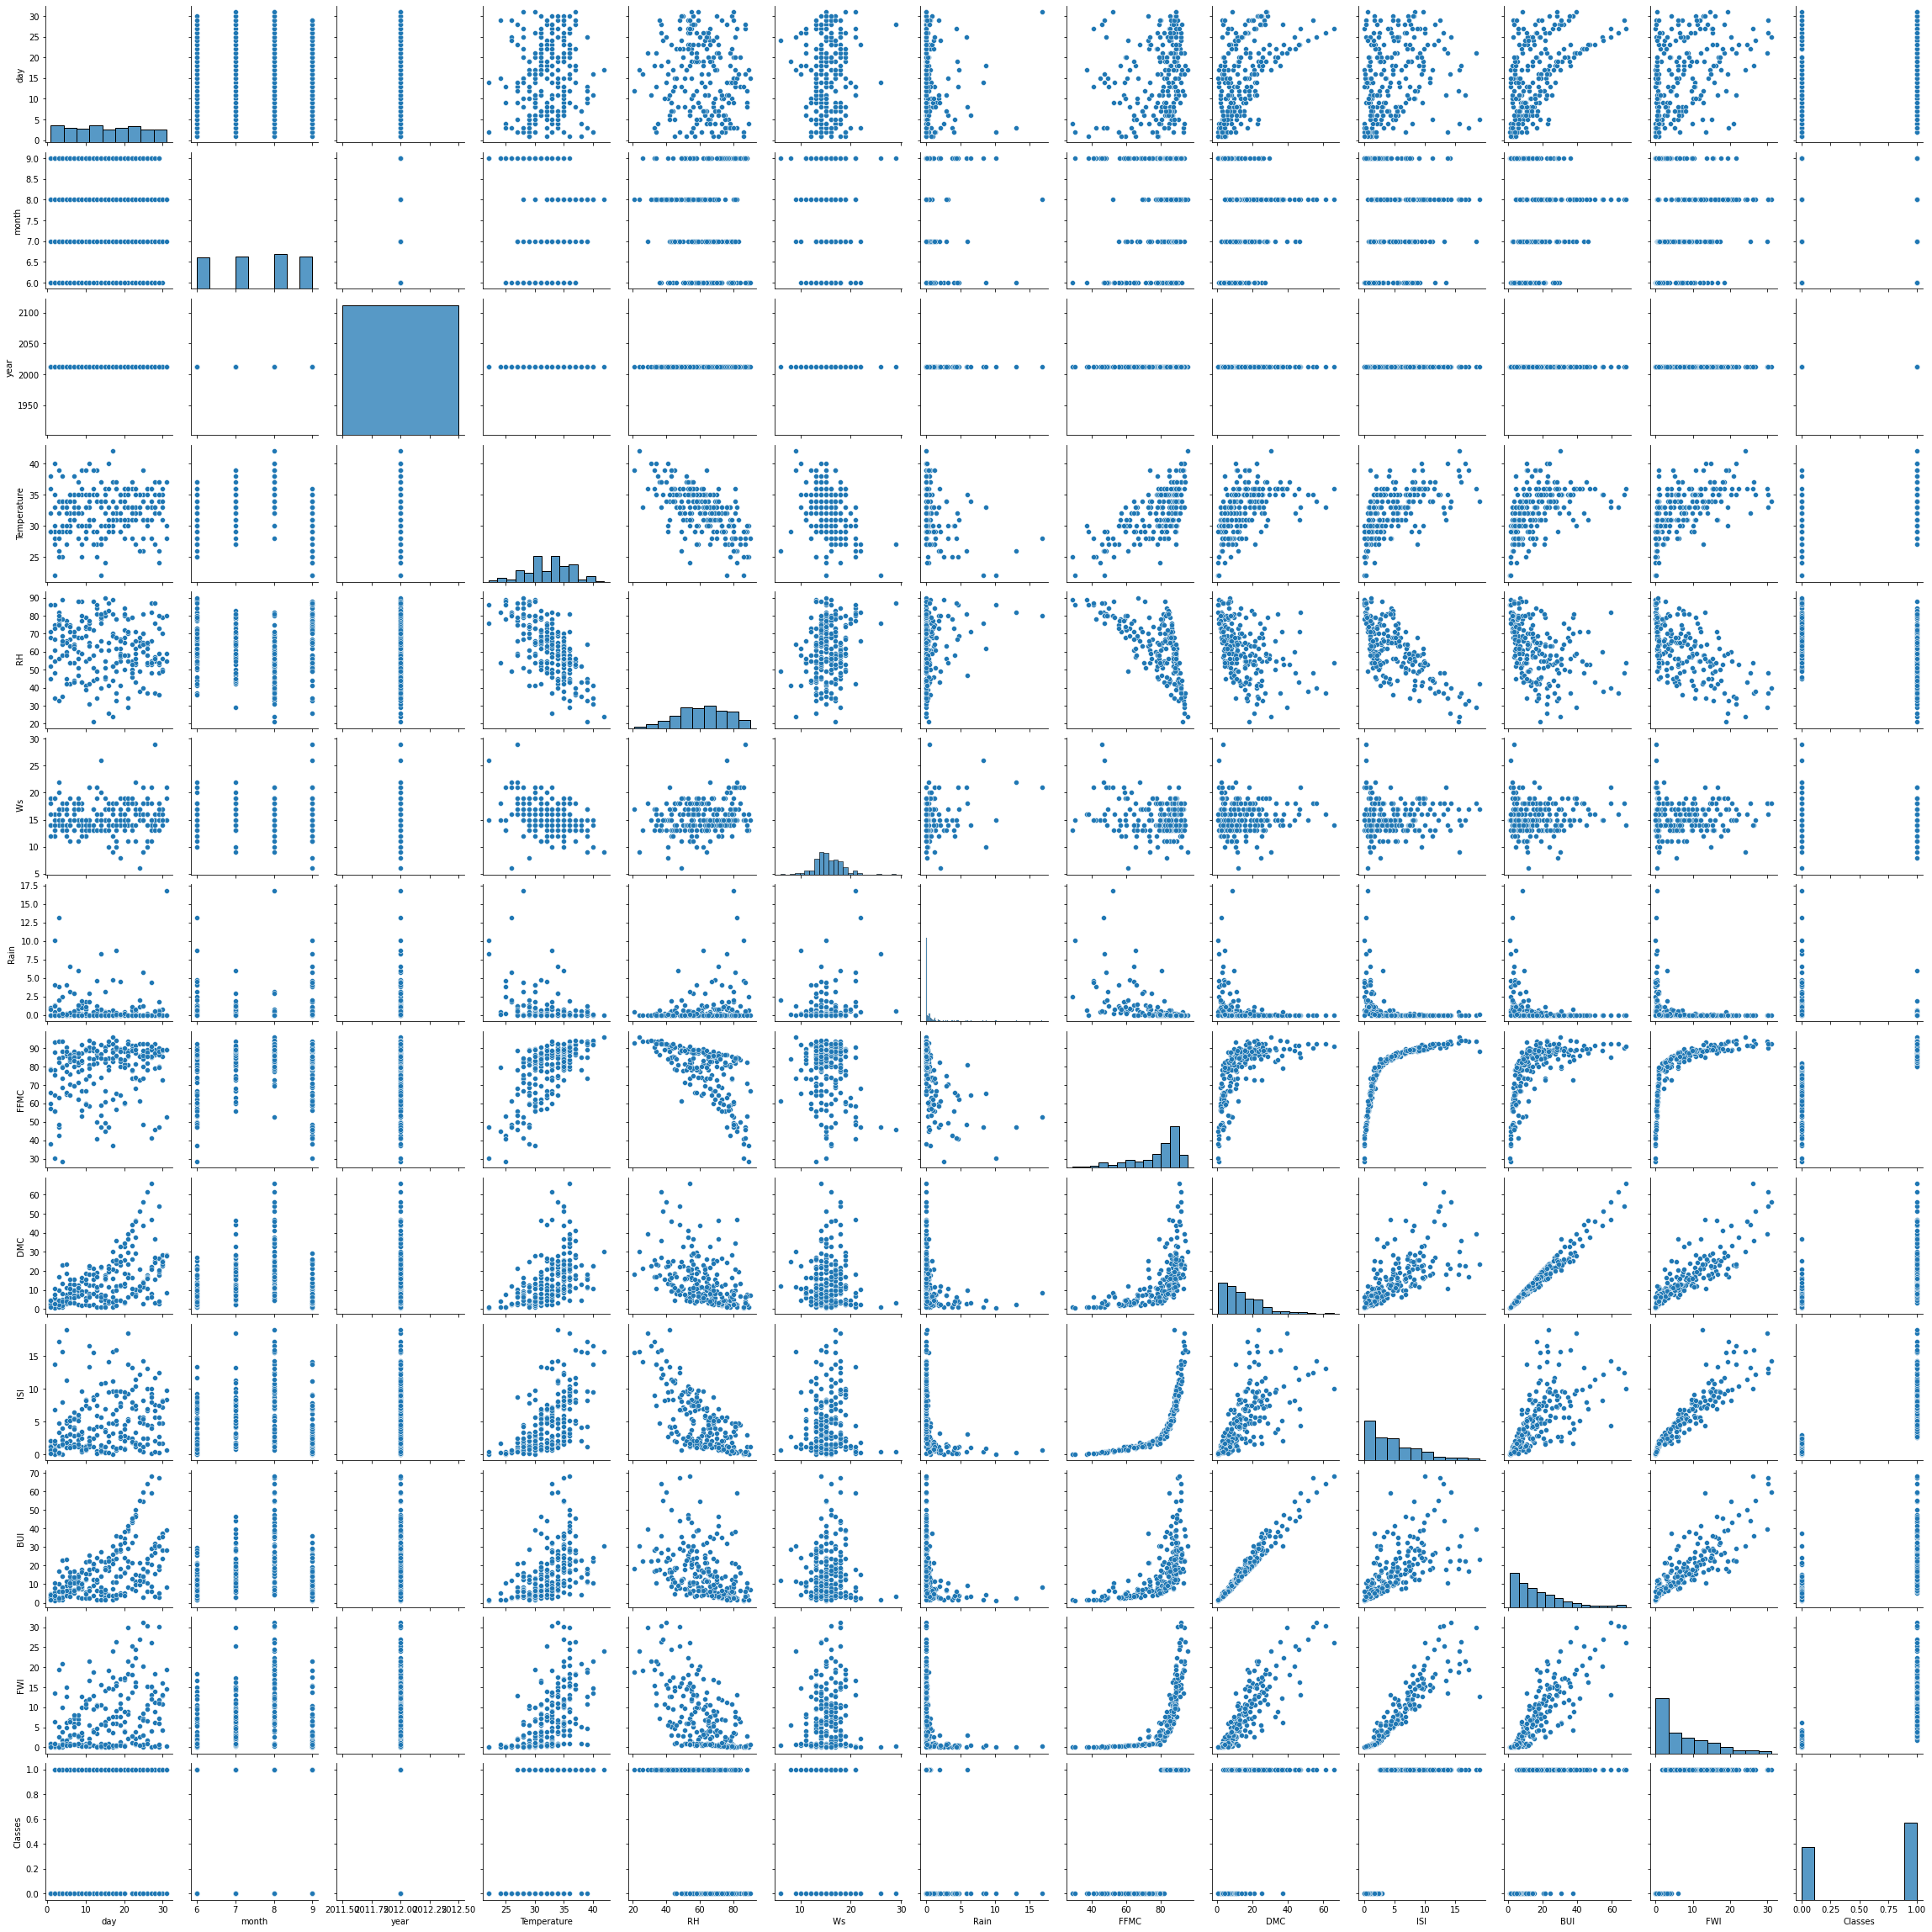

In [41]:
sns.pairplot(dataset)

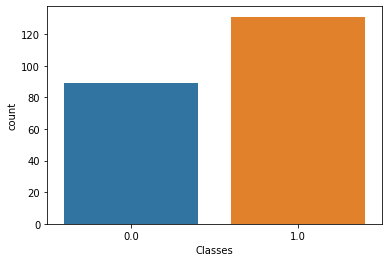

In [42]:
sns.countplot(x='Classes', data = dataset)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


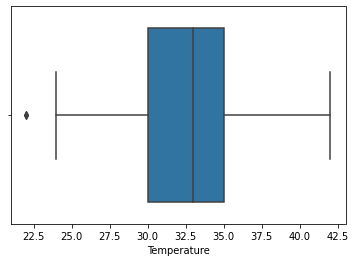

In [43]:
sns.boxplot(dataset['Temperature'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


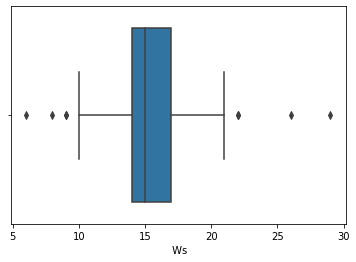

In [46]:
sns.boxplot(dataset[' Ws'])

# Splitting the dataset into the Training set and Test set

In [47]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [49]:
print(X_train)

[[-1.28193881e+00  1.30194348e+00  0.00000000e+00 ... -7.72747622e-01
  -7.56115663e-01 -8.47982053e-01]
 [-1.16821843e+00 -1.35016361e+00  0.00000000e+00 ... -8.43087834e-01
  -9.10812213e-01 -8.74811782e-01]
 [ 1.21990951e+00  1.30194348e+00  0.00000000e+00 ... -6.93455020e-02
   4.68330970e-02 -6.99199008e-02]
 ...
 [-3.72175783e-01 -1.35016361e+00  0.00000000e+00 ...  9.15417466e-01
   3.63592699e-01  7.88631439e-01]
 [ 1.10618913e+00 -4.66127914e-01  0.00000000e+00 ...  9.94710069e-04
   1.64697135e-01  3.73990167e-02]
 [-2.58455405e-01  4.17907785e-01  0.00000000e+00 ...  6.34056618e-01
   9.10321113e-02  4.66674687e-01]]


In [50]:
print(X_test)

[[ 0.87874838 -0.46612791  0.         -0.30382568  0.64302134  0.48658971
  -0.38968796  0.65945868  2.72909776  1.07380842  0.49337619  2.2273178
   1.24473684]
 [ 0.87874838  0.41790779  0.          1.05843619 -0.561883    0.154824
  -0.38968796  0.80798725  1.96985047  2.41792627  1.314012    2.30098283
   2.04962872]
 [ 0.53758724  0.41790779  0.          0.78598381  0.44220395  1.15012113
  -0.38968796  0.72697167  0.982829    1.75339441  0.9388642   1.35807052
   1.31181116]
 [-1.50937956  0.41790779  0.          2.14824568 -1.83372648 -0.50870742
  -0.38968796  1.06453661 -0.29101923 -0.5950483   2.11120107 -0.41725655
   0.86912063]
 [-1.39565919  0.41790779  0.          1.8757933  -1.90066561  0.48658971
  -0.38968796  1.0915418   0.24045387 -0.36493533  2.90839014  0.0468331
   1.67401251]
 [-0.2584554  -0.46612791  0.          1.8757933  -1.09739604 -0.84047313
  -0.12065652  0.51768141 -0.24883883 -0.83161305 -0.13968571 -0.39515705
  -0.31138747]
 [-0.37217578  0.41790779 

## Training the Logistic Regression model on the Training set

Logistic regression is machine learning algorithm which is used for classification problems.

It is a predictive analysis algorithm and based on concept of probablity. 

In [51]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

##K-fold Cross Validation of Logistic Regression

The k-fold cross-validation procedure is a standard method for estimating the performance of a machine learning algorithm or configuration on a dataset.

The k-fold cross-validation procedure divides a limited dataset into k non-overlapping folds. Each of the k folds is given an opportunity to be used as a held back test set, whilst all other folds collectively are used as a training dataset. A total of k models are fit and evaluated on the k hold-out test sets and the mean performance is reported.

In [60]:
from sklearn.model_selection import cross_val_score
score_prev=0
for i in range(3,11):
  scores = cross_val_score(classifier, X, y, cv=i, scoring='accuracy')
  if(scores >= score_prev):
     score_prev=scores
#print(scores)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


ValueError: ignored

In [57]:
print(scores.mean())

0.9363815870665185


## Predicting the Test set results

In [61]:
y_train_pred = classifier.predict(X_train)
cm=confusion_matrix(y_train, y_train_pred)
print(cm)

[[69  1]
 [ 1 94]]


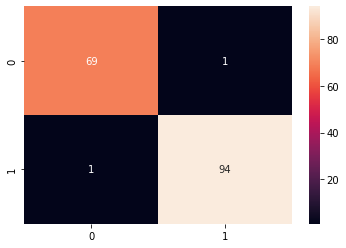

In [62]:
label=['0','1']
sns.heatmap(cm,annot=True,xticklabels=label,yticklabels=label)

In [63]:
accuracy_score(y_train, y_train_pred)

0.9878787878787879

## Predicting a new result

In [64]:
y_pred = classifier.predict(X_test)
print(y_pred)

[1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1.
 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1.
 0. 1. 0. 1. 1. 1. 0.]


In [66]:
Xnew1 = [[30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5]]
Xnew1=sc.transform(Xnew1)
ynew1 = classifier.predict(Xnew1)
print("Xnew=%s, Predicted=%s" % (Xnew1[0], ynew1[0]))

Xnew2 = [[29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7]]
Xnew2=sc.transform(Xnew2)
ynew2 = classifier.predict(Xnew2)
print("Xnew2=%s, Predicted=%s" % (Xnew2[0], ynew2[0]))

Xnew=[ 1.67479102  1.30194348  0.         -2.21099228  0.17444743 -0.17694171
 -0.30001081 -0.69080107 -0.8815449  -0.70042714 -0.84308783 -0.84451369
 -0.87481178], Predicted=0.0
Xnew2=[ 1.56107065  1.30194348  0.         -2.21099228 -0.49494387  0.81835542
 -0.34484938  0.14635997 -0.83936449 -0.7283848  -0.72585415 -0.82241418
 -0.84798205], Predicted=0.0


## Making the Confusion Matrix

In [67]:
cm1=confusion_matrix(y_test, y_pred)
print(cm1)

[[17  2]
 [ 2 34]]


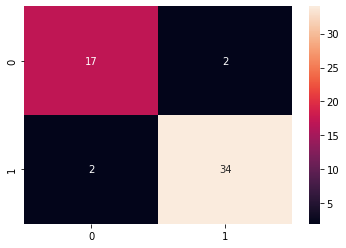

In [68]:
label=['0','1']
sns.heatmap(cm1,annot=True,xticklabels=label,yticklabels=label)

In [69]:
accuracy_score(y_test, y_pred)

0.9272727272727272

##Description of classification report
The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The support is the number of occurrences of each class in y_true.

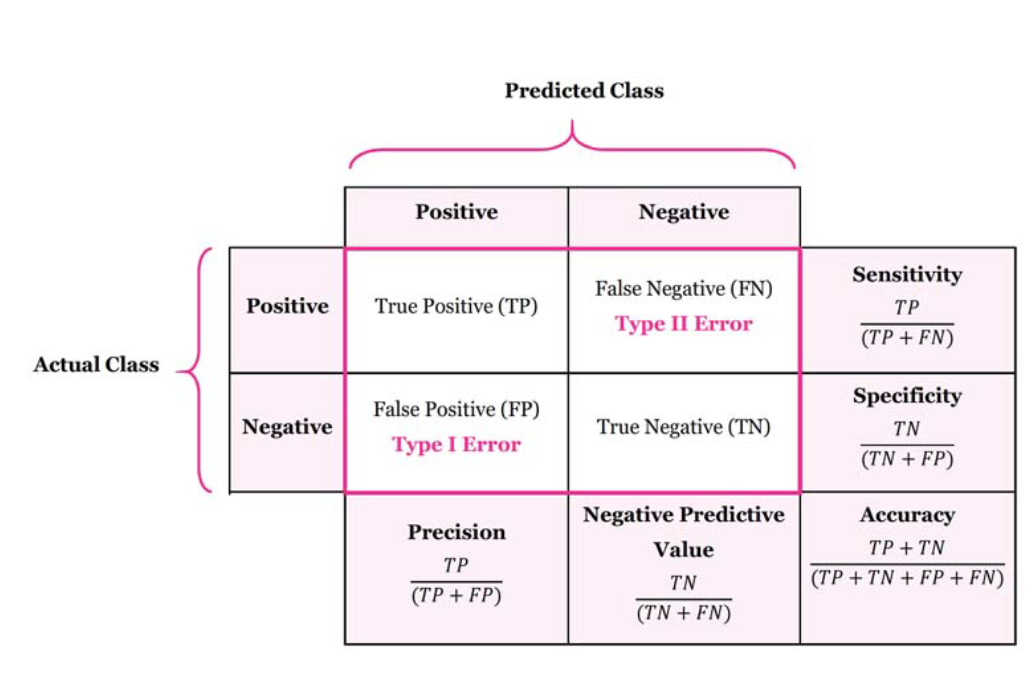

In [70]:
print(classification_report(y_test,classifier.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89        19
         1.0       0.94      0.94      0.94        36

    accuracy                           0.93        55
   macro avg       0.92      0.92      0.92        55
weighted avg       0.93      0.93      0.93        55



In [71]:
sns.regplot(x='Age', y='Purchased', data=dataset, logistic=True)

KeyError: ignored

#Comparing logistics Model with Naive Baye's Model

In [72]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

##k-fold Cross Validation for Naive bayes

In [73]:
from sklearn.model_selection import cross_val_score
naive_scores = cross_val_score(classifier, X, y, cv=10, scoring='accuracy')
print(naive_scores)

[0.90909091 1.         0.95454545 0.86363636 0.95454545 0.86363636
 1.         1.         0.90909091 0.90909091]


In [74]:
print(naive_scores.mean())

0.9363636363636363


##Confusion Matrix by using Naive Bayes

In [75]:
y_train_pred = classifier.predict(X_train)
cm3=confusion_matrix(y_train, y_train_pred)
print(cm3)

[[66  4]
 [ 4 91]]


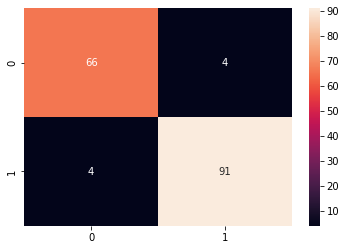

In [76]:
label=['0','1']
sns.heatmap(cm3,annot=True,xticklabels=label,yticklabels=label)

In [77]:
accuracy_score(y_train, y_train_pred)

0.9515151515151515

In [78]:
y_pred1 = classifier.predict(X_test)

In [79]:
cm4=confusion_matrix(y_test, y_pred1)

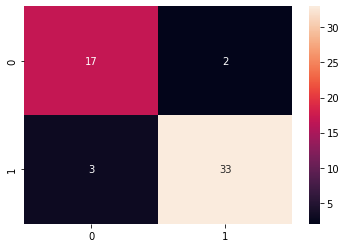

In [80]:
label=['0','1']
sns.heatmap(cm4,annot=True,xticklabels=label,yticklabels=label)

In [81]:
accuracy_score(y_test, y_pred1)

0.9090909090909091

In [82]:
print(classification_report(y_test,classifier.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87        19
         1.0       0.94      0.92      0.93        36

    accuracy                           0.91        55
   macro avg       0.90      0.91      0.90        55
weighted avg       0.91      0.91      0.91        55



#AUC-ROC Curve

The Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems. It is a probability curve that plots the TPR against FPR at various threshold values and essentially separates the ‘signal’ from the ‘noise’. 

The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.

In [83]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, y_pred, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, y_pred1, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [84]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, y_pred)
auc_score2 = roc_auc_score(y_test, y_pred1)

print(auc_score1, auc_score2)

0.9195906432748537 0.9057017543859649


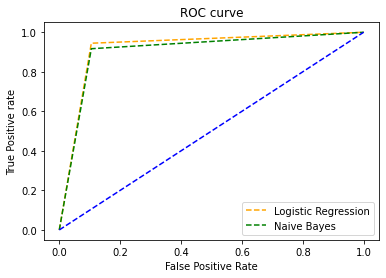

In [85]:
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Naive Bayes')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

Here 0.5<AUC_score<1,hence classifier is able to distinguish the positive class values from the negative class values in both the cases. This is so because the classifier is able to detect more numbers of True positives and True negatives than False negatives and False positives.